# BAIT 509 Assignment 3

__Evaluates__: Lectures 1 - 9. 

__Rubrics__: Your solutions will be assessed primarily on the accuracy of your coding, as well as the clarity and correctness of your written responses. The MDS rubrics provide a good guide as to what is expected of you in your responses to the assignment questions. In particular, here are the most relevant ones:

- [accuracy rubric](https://github.com/UBC-MDS/public/blob/master/rubric/rubric_accuracy.md), for evaluating your code.
- [reasoning rubric](https://github.com/UBC-MDS/public/blob/master/rubric/rubric_reasoning.md), for evaluating your written responses.

__Attribution__: This assignment was created by Tomas Beuzen and Vincenzo Coia.

## Tidy Submission (5%)

- Complete this assignment by filling out this jupyter notebook.
- You must use proper English, spelling, and grammar.
- You will submit two things to Canvas:
    1. This jupyter notebook file containing your responses; and,
    2. A html file of your completed notebook (use `jupyter nbconvert --to html_embed assignment.ipynb` in the terminal to generate the html file).
- Submit your assignment through [UBC Canvas](https://canvas.ubc.ca/courses/35074) by **11:59pm Friday 7th February**.

## Exercise 1: Revision of concepts (20%)
The following questions relate to material covered in lectures 1-4. Respond to the questions without using code. Provide clear and concise (1-3 sentence) answers to any written questions.

### 1.1 (5%)

Suppose you are tuning the `k` hyperparameter of a kNN classifier and you get the following results. Which value for `k` would you pick? Explain your answer in 1 sentence.

| k  | train error| validation error|
|---:|--------------:|-------------------:|
| 10 | 0.31          | 0.35               |
| 7  | 0.22          | 0.26               |
| 5  | 0.13          | 0.15               |
| 3  | 0.06          | 0.11               |
| 1  | 0.00           | 0.15               |

#### <font color="green">Solution 1.1</font>

Two possible answers (if appropriately justified):

- $k = 3$ because it has the low train and validation accuracies.
- $k = 5$ because it has low validation accuracy and appears to be the least overfit (the gap between train and validation error is small).

### 1.2 (5%)

Each of the following figures illustrates the decision boundary of a classifier fit on a data set with two features and three classes.

<img src='fig1.png' width="950">

For each of the classifiers listed below, write down the corresponding letter (A, B,or C) to match it with one of the three figures above.

- Logistic regression
- Decision tree (with no max depth)
- Random forest (with no max depth)

#### <font color="green">Solution 1.2</font>

- Logistic regression: **A**
- Decision tree (with no max depth): **B**
- Random forest (with no max depth): **C**

### 1.3 (5%)

Thinking about `k` in `k`-fold cross validation and the bias-variance tradeoff briefly, discuss (1-2 sentences) how bias and variance change with the value of `k`. Section 5.1.4 in the text [An Introduction to Statistical Learning](http://faculty.marshall.usc.edu/gareth-james/ISL/) might be helpful here.

#### <font color="green">Solution 1.3</font>

- **Low k**: Higher bias (because we are using less of our data to train our model), lower variance (because we are estimating our error using a larger number of samples)

- **High k**: Lower bias (because we are using more of our data to train our model), higher variance (because we are estimating error on less samples).

Read more [here](https://www.cs.cmu.edu/~schneide/tut5/node42.html).

### 1.4 (5%)

In an overfit regression model, how would the validation error compare to the training error? (One brief sentence). What does this mean, in terms of using the regression model in the real world? (One brief sentence).

#### <font color="green">Solution 1.4</font>

Test error would be much greater than training error, hence the classifier could be unreliable on new data.

## Exercise 2: Random Forests (20%)

In this exercise we will work with the "cars_data.csv" file provided to you with this assignment. This datset contains 392 observations of different cars. We are interested in whether a car his high mileage (miles per gallon, mpg,  >= 23) or low mileage (mpg < 23) and we wish to predict this quality based on other features of the car such as number of cylinders in the `engine`, `horsepower`, `weight`, etc.

### 2.1 (10%)

- Load the `cars_data.csv` file into a Pandas dataframe and remove the `name` and `mpg` columns.
- Split the data into features (X) and response (y) dataframes.
- Split the data into training (80%) and testings (20%) sets.
- Using 10-fold cross validation and the training set only, plot the training error and validation error of a `DecisionTreeClassifier` and a `RandomForestClassifier` for different values of `max_depth` (your plot should have 4 lines, 2 for training/validation error of the `DecisionTreeClassifier` and 2 for training/validation error of the `RandomForestClassifier`)

#### <font color="green">Solution 2.1</font>

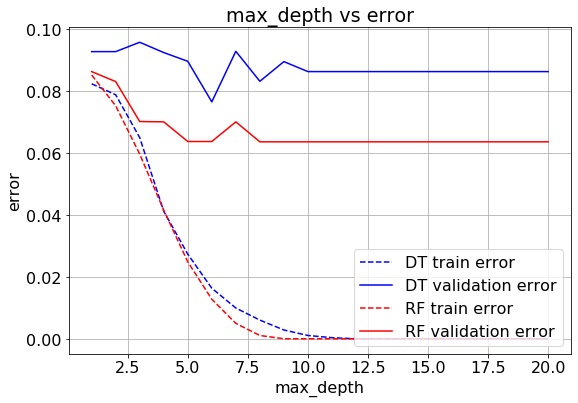

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# load data
df = pd.read_csv("data/cars_data.csv").drop(columns=["name", "mpg"])
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='mileage'),
                                                    df['mileage'],
                                                    test_size=0.2,
                                                    random_state=123)

# calculation loop
max_depth_dict = {'max_depth':[],
                  'DT_train_error':[],
                  'DT_validation_error': [],
                  'RF_train_error':[],
                  'RF_validation_error': []}
for depth in np.arange(1, 21):
    model = DecisionTreeClassifier(max_depth = depth, random_state=0)
    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    max_depth_dict['max_depth'].append(depth)    
    max_depth_dict['DT_train_error'].append(1 - scores['train_score'].mean())
    max_depth_dict['DT_validation_error'].append(1 - scores['test_score'].mean())
    # Random Forest
    model = RandomForestClassifier(max_depth = depth, n_estimators=100, random_state=0)
    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    max_depth_dict['RF_train_error'].append(1 - scores['train_score'].mean())
    max_depth_dict['RF_validation_error'].append(1 - scores['test_score'].mean())
    
# plot with matplotlib
plt.rcParams.update({'font.size': 16}) # update font size of plot
plt.subplots(1, 1, figsize = (9, 6)) # create plot canvas
plt.plot(max_depth_dict['max_depth'],
         max_depth_dict['DT_train_error'], '--b', label='DT train error')  # plot the two lines
plt.plot(max_depth_dict['max_depth'],
         max_depth_dict['DT_validation_error'], '-b', label='DT validation error')
plt.plot(max_depth_dict['max_depth'],
         max_depth_dict['RF_train_error'], '--r', label='RF train error')  # plot the two lines
plt.plot(max_depth_dict['max_depth'],
         max_depth_dict['RF_validation_error'], '-r', label='RF validation error')
plt.grid() # the next few lines are formatting
plt.title('max_depth vs error')
plt.xlabel('max_depth')
plt.ylabel('error')
plt.legend(loc=4);

### 2.2 (10%)

1. What is the main purpose of averaging the results of multiple trees in a random forest?
2. In random forests, how do we ensure that the trees being averaged are sufficiently different from each other as to make the averaging effective?
3. Why did we remove the features `"name"` and `"mpg"` before conducting our analysis above?

#### <font color="green">Solution 2.2</font>

1. Random Forest are typically made of multiple trees with low bias and high variance (i.e., overfit trees). The purpose of averaging predictions from multiple low bias/high variance trees is to reduce the variance. This idea is illustrated nicely in the plot in Question 2.1.
2. There are two main sources of randomness:
    - We randomly bootstrap sample from our dataset to fit each individual tree;
    - We only consider a random number of our possible features when we are deciding on each split in a tree.
3. Because these features had unique values for every row. A ML model could have easily overfit to these features, because each unique one corresponded to a particular class label (0 or 1).

## Exercise 3: Support Vector Machines (35%)

This exercise is based off exercises in Section 9.7 in [An Introduction to Statistical Learning](http://faculty.marshall.usc.edu/gareth-james/ISL/).

### 3.1 (5%)

Consider the binary classification dataset below of 7 observations, 2 features, 1 response.
- Plot the data
- On your plot, roughly plot what you think might be the maximum-margin hyperplane (just eye-ball this!).

In [2]:
import pandas as pd
df = pd.DataFrame({'feature_1': [3, 2, 4, 1, 2, 4, 4],
                   'feature_2': [4, 2, 4, 4, 1, 3, 1],
                   'response': ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']})
df

,feature_1,feature_2,response
0,3,4,red
1,2,2,red
2,4,4,red
3,1,4,red
4,2,1,blue
5,4,3,blue
6,4,1,blue


#### <font color="green">Solution 3.1</font>

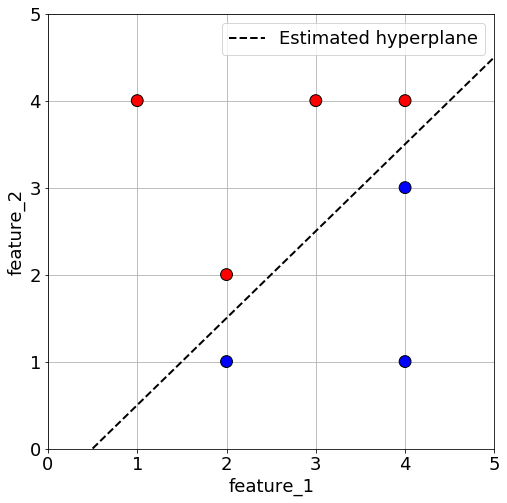

In [3]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rcParams['axes.axisbelow'] = True
plt.subplots(1,1,figsize=(8,8))
X = df[['feature_1', 'feature_2']]
y = df['response']
plt.scatter(df['feature_1'], df['feature_2'], s=140, ec='k', c=df['response'])
plt.plot([0.5, 5], [0, 4.5], '--k', lw=2, label='Estimated hyperplane')
plt.grid()
plt.ylim(0, 5)
plt.xlim(0, 5)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.legend();

### 3.2 (10%)

We can obtain the exact maximum margin hyperplane by using sklearn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC). The code below fits the maximum margin hyperplane to our dataset __\*__. Access the appropriate attributes from the fitted model to write down the exact equation of the maximum-margin classifier (for two features, the equation should have the form $β_0 + β_1X_1 + β_2X_2 = 0$).

__\*__ Note that I've used a bit of a hack to obtain the maximum margin hyperplane, by using a large `C` value in the `SVC` model here we stop any regularization happening to ensure that we get back the maximum margin hyperplane, as opposed to some more generalized support vector classifier.

In [4]:
from sklearn.svm import SVC
X = df.drop(columns='response')
y = df['response']
clf = SVC(kernel='linear', C=10_000).fit(X, y)

#### <font color="green">Solution 3.2</font>

In [5]:
print(f"        The intercept (β_0) = {clf.intercept_[0]:.2f}")
print(f"Feature 1 coefficient (β_1) = {clf.coef_[0,0]:.2f}")
print(f"Feature 2 coefficient (β_2) = {clf.coef_[0,1]:.2f}")

        The intercept (β_0) = 1.00
Feature 1 coefficient (β_1) = -2.00
Feature 2 coefficient (β_2) = 2.00


The equation is therefore: $1.00 - 2.00X_1 + 2.00X_2 = 0$

### 3.3 (10%)

- Plot your data again and this time plot the exact maximum-margin hyperplane using the equation you derived above.
- Circle the support vectors.

#### <font color="green">Solution 3.3</font>

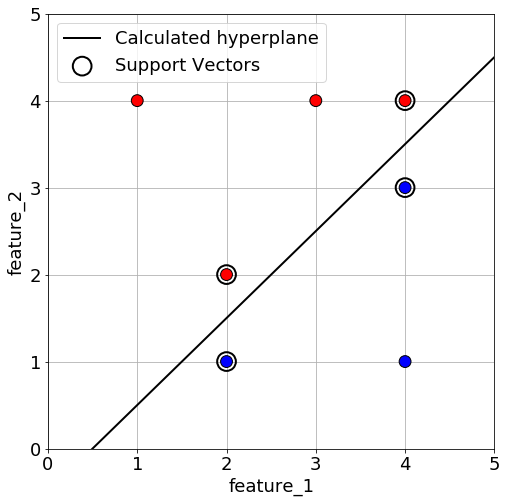

In [6]:
import numpy as np
# first, we can actually access our support vectors using the attribute
sv = clf.support_vectors_;
# create some x1's to help plot our line
x1 = np.linspace(0, 5, 20)
# now calculate x2 based on our equation
x2 = x1 - 0.5
# now make our plot
plt.subplots(1,1,figsize=(8,8))
X = df[['feature_1', 'feature_2']]
y = df['response']
plt.scatter(df['feature_1'], df['feature_2'], s=140, ec='k', c=df['response']) # plot raw data
plt.scatter(sv[:,0], sv[:,1], 350, facecolors='none', ec='k', lw=2, label="Support Vectors") # circle support vectors
plt.plot(x1, x2, '-k', lw=2, label='Calculated hyperplane') # plot hyperplane
plt.grid()
plt.ylim(0, 5)
plt.xlim(0, 5)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.legend();

### 3.4 (10%)

- Add an additional observation to the dataset so that the two classes are no longer separable by a straight line on your plot.
- The point you added will mean that we can no longer seperate the red and blue classes with a straight line. So we will use an `rbf` kernel to help us create a non-linear decision boundary.  Fit a SVC model using default hyperparameters (`kernel='rbf'`, `C=1.0`) with your new modified dataset.
- Use the plotting function below to help you plot the decision function of your now non-linear decision boundary.
- (optional) Play around with your value of `C` to try and perfectly classify your dataset!

In [7]:
def plot_rbf_decision_boundary(X, y, model):
    """
    Plot the decision boundary of a sklearn SVC mode1.
    
    Parameters
    ----------
    X : datatype
        A 2-column dataframe of the features.
    y : datatype
        A dataframe of the response.
    model : datatype
        A fitted SVC model.
    
    Returns
    -------
    plot
        A matplotlib plot of "model"s decision function.
    """
    
    # we need a grid to help us plot the decision function
    xx1, xx2 = np.meshgrid(np.linspace(X.min()[0]-1, X.max()[0]+1, 200),
                           np.linspace(X.min()[1]-1, X.max()[1]+1, 200))
    # use the model to calculate predictions across the grid
    Z = model.decision_function(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    # make the plot
    plt.subplots(1,1,figsize=(8,8))
    plt.scatter(X[X.columns[0]], X[X.columns[1]], s=140, ec='k', c=y[y.columns[0]], zorder=3) # plot raw data
    plt.pcolormesh(xx1, xx2, -Z, cmap='RdBu', zorder=0) # plot decision function
    plt.ylim(0, 5)
    plt.xlim(0, 5)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])     

#### <font color="green">Solution 3.4</font>

/Users/tbeuzen/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


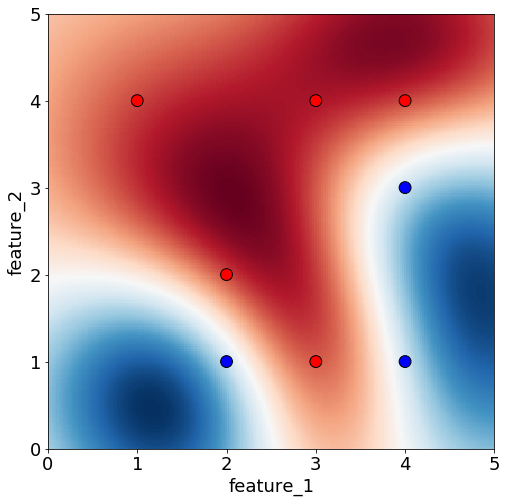

In [8]:
df = pd.DataFrame({'feature_1': [3, 2, 4, 1, 2, 4, 4, 3],
                   'feature_2': [4, 2, 4, 4, 1, 3, 1, 1],
                   'response': ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'red']})
X = df[['feature_1', 'feature_2']]
y = df[['response']]
model = SVC(kernel='rbf', gamma='scale', C=10).fit(X, y)
plot_rbf_decision_boundary(X, y, model)

## Exercise 4: Probabilistic Forecasting (20%)

In this exercise we will work with the "diamonds_data.csv" file provided to you with this assignment. This datset contains 53,940 observations of different diamonds. We will be using length, width, and depth (`x`, `y`, and `z`mm respectively) to predict the quality of the `cut` of a diamond (which can take 5 values, ranging from worst to best as: "Fair", "Good", "Very Good", "Premium", "Ideal")

You own a shop that sells diamonds, and you receive word of two new diamonds, with the following dimensions: 

- Diamond 1: `x=4`, `y=4`, and `z=3`.
- Diamond 2: `x=6`, `y=6`, and `z=4`.

You can choose only one diamond to include in your store, but only have this information. You want the diamond with the highest cut quality.

### 4.1 (10%)

Choose a scikit-learn classification model that facilitates the prediction of probabilities. Fit a model to the data and predict what is the probability of your two diamonds belonging to each of the five classes. Plot two histograms (one for each diamond) showing the distribution of your probabilistic predictions. Which diamond would you choose based on your analysis?

#### <font color="green">Solution 4.1</font>

In [9]:
# I will use Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
# Load the data
df = pd.read_csv('data/diamonds_data.csv').drop(columns=['carat', 'color', 'clarity', 'depth', 'table', 'price'])
X = df.drop(columns='cut')
y = df['cut']
# Optimise the model (if a student does not do this step, reduce marks)
model = GridSearchCV(LogisticRegression(solver='lbfgs', multi_class='multinomial'),
                     {'C': [0.1, 1, 10]},
                     cv=10).fit(X, y)

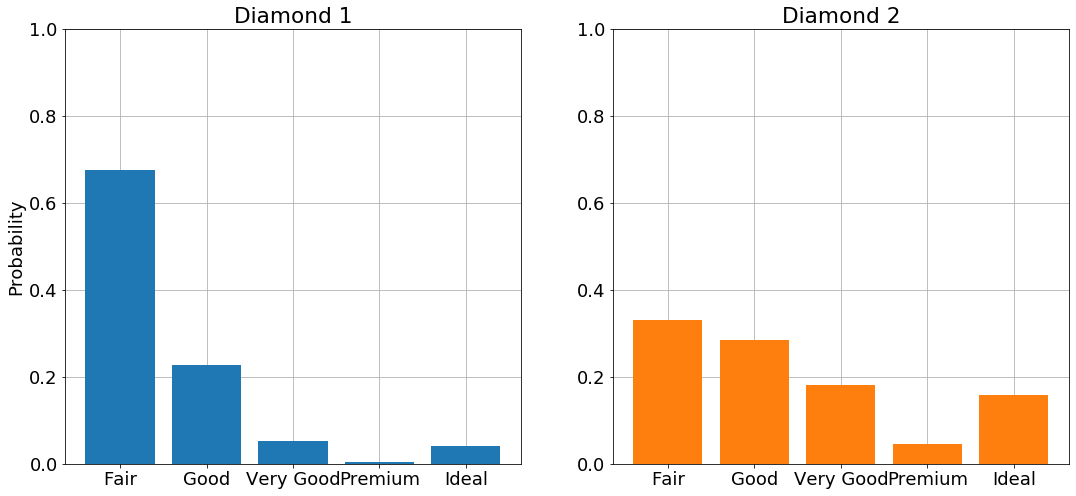

In [10]:
# now make our plot
# NOTE: model.classes_ has order: ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
# BUT: we want order ["Fair", "Good", "Very Good", "Premium", "Ideal"], so we need to re-arrange 
# the output of predict_proba using a list to index the output: [[0, 1, 4, 3, 2]]
diamond_1 = model.predict_proba(np.atleast_2d([4, 4, 3]))[0][[0, 1, 4, 3, 2]]
diamond_2 = model.predict_proba(np.atleast_2d([6, 6, 4]))[0][[0, 1, 4, 3, 2]]
fig, ax = plt.subplots(1,2,figsize=(18,8))
ax[0].bar(np.arange(5),
          diamond_1,
          tick_label=["Fair", "Good", "Very Good", "Premium", "Ideal"])
ax[0].set_title('Diamond 1')
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[1].set_title('Diamond 2')
ax[1].bar(np.arange(5),
          diamond_2,
          tick_label=["Fair", "Good", "Very Good", "Premium", "Ideal"],
          color='C1')
ax[1].set_ylim(0, 1)
ax[1].grid()

Based on the above, I would choose diamond 2, as it has a higher probability of having a cut > "Fair"

### 4.2 (10%)

For the scikit-learn model you chose to answer Question 4.1, briefly describe how the model estimates probabilities.

#### <font color="green">Solution 4.2</font>

Answer depends on the model, but for some common models, probabilities are calculated as:
- RandomForestClassifier = the probability distribution of a single tree is simply the fraction of samples of each class for the leaf predicted for features $X_i$. The random forest outputted probability distribution is the average of these vectors across all trees in the forest.
- KNNClassifier = simply counts the frequency of the different labels of the k-nearest neighbours.
- LogisticRegression = probability is calculated using the logistic function (the multinomial version for multi-class problems)